##  Support Vector Machines Classifier

###### https://kaggle.com/code/prashant111/svm-classifier-tutorial/notebook#Support-Vector-Machines-Classifier-Tutorial-with-Python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("pulsar_data_train.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
df.shape  

(12528, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [7]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                12528 non-null  float64
 1   Standard deviation of the integrated profile  12528 non-null  float64
 2   Excess kurtosis of the integrated profile     10793 non-null  float64
 3   Skewness of the integrated profile            12528 non-null  float64
 4   Mean of the DM-SNR curve                      12528 non-null  float64
 5   Standard deviation of the DM-SNR curve        11350 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7   Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                  12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [10]:
df.columns = [
    "IP Mean",
    "IP Sd",
    "IP Kurtosis",
    "IP Skewness",
    "DM-SNR Mean",
    "DM-SNR Sd",
    "DM-SNR Kurtosis",
    "DM-SNR Skewness",
    "target_class",
]

In [11]:
df["target_class"].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [12]:
df["target_class"].value_counts() / df.shape[0] * 100

target_class
0.0    90.796616
1.0     9.203384
Name: count, dtype: float64

In [13]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [19]:
df.isnull().sum() / df.shape[0] * 100

IP Mean             0.000000
IP Sd               0.000000
IP Kurtosis        13.848978
IP Skewness         0.000000
DM-SNR Mean         0.000000
DM-SNR Sd           9.402937
DM-SNR Kurtosis     0.000000
DM-SNR Skewness     4.988825
target_class        0.000000
dtype: float64

In [20]:
len(df.columns)

9

In [28]:
df.dropna(thresh=7)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [33]:
df.dropna(thresh=8,inplace=True)

In [34]:
df.shape  # (12528, 9)

(12250, 9)

In [35]:
df.isnull().sum() / df.shape[0] * 100

IP Mean             0.000000
IP Sd               0.000000
IP Kurtosis        12.318367
IP Skewness         0.000000
DM-SNR Mean         0.000000
DM-SNR Sd           8.048980
DM-SNR Kurtosis     0.000000
DM-SNR Skewness     3.934694
target_class        0.000000
dtype: float64

<Axes: xlabel='IP Kurtosis', ylabel='Density'>

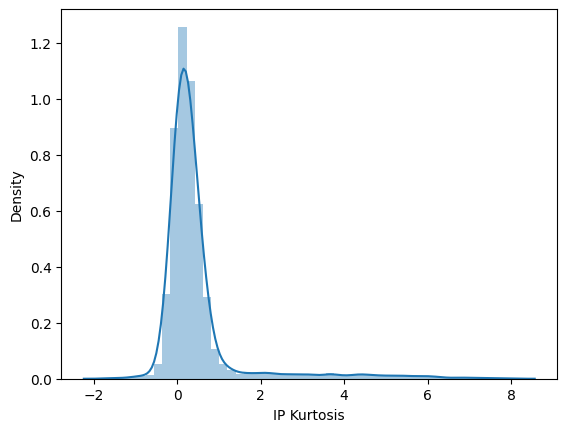

In [42]:
sns.distplot(df["IP Kurtosis"])

In [45]:
df["IP Kurtosis"].interpolate(method="linear",inplace=True)

In [46]:
df.isnull().sum() / df.shape[0] * 100

IP Mean            0.000000
IP Sd              0.000000
IP Kurtosis        0.000000
IP Skewness        0.000000
DM-SNR Mean        0.000000
DM-SNR Sd          8.048980
DM-SNR Kurtosis    0.000000
DM-SNR Skewness    3.934694
target_class       0.000000
dtype: float64

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [50]:
df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000
mean,111.029060,46.516413,0.479723,1.803155,12.797125,26.355180,8.312051,105.299441,0.092191
std,25.791738,6.820478,1.032796,6.304067,29.851152,19.555968,4.536674,107.290312,0.289308
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.804688,42.338655,0.034485,-0.188153,1.916597,14.416762,5.787724,34.945807,0.000000
50%,115.175781,46.905222,0.228750,0.205341,2.803930,18.452225,8.430889,83.047119,0.000000
75%,127.265625,51.017448,0.472127,0.939644,5.455477,28.352815,10.697866,139.309331,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


IP Mean               Axes(0.125,0.653529;0.227941x0.226471)
IP Sd              Axes(0.398529,0.653529;0.227941x0.226471)
IP Kurtosis        Axes(0.672059,0.653529;0.227941x0.226471)
IP Skewness           Axes(0.125,0.381765;0.227941x0.226471)
DM-SNR Mean        Axes(0.398529,0.381765;0.227941x0.226471)
DM-SNR Sd          Axes(0.672059,0.381765;0.227941x0.226471)
DM-SNR Kurtosis           Axes(0.125,0.11;0.227941x0.226471)
DM-SNR Skewness        Axes(0.398529,0.11;0.227941x0.226471)
target_class           Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

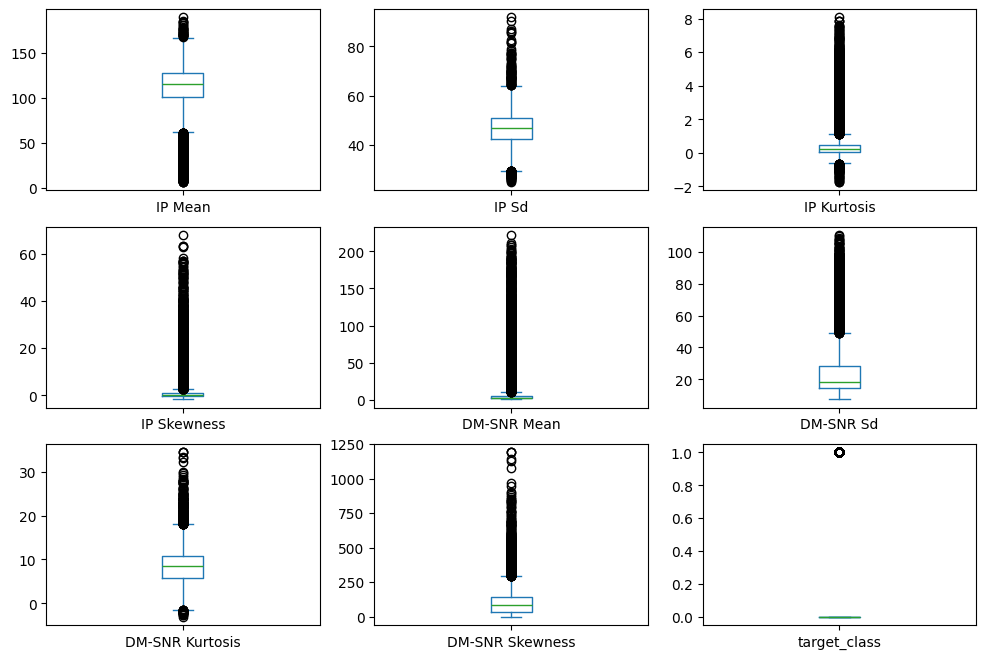

In [59]:
df.plot(kind="box", subplots=True, figsize=(12, 8), layout=(3, 3))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

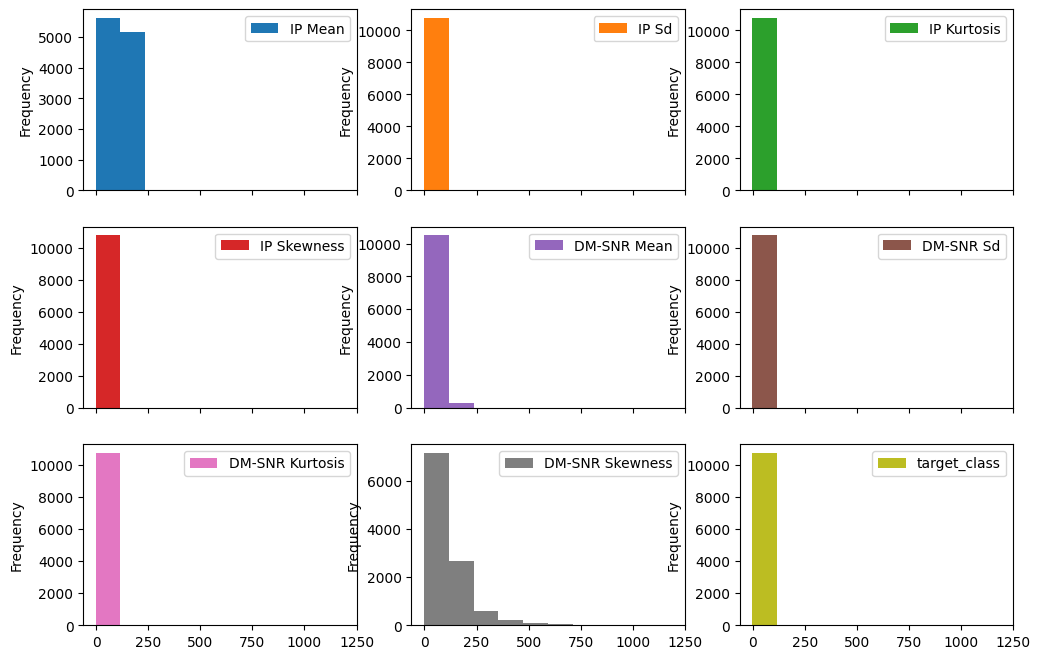

In [68]:
df.plot(kind="hist",subplots=True, figsize=(12, 8), layout=(3, 3))

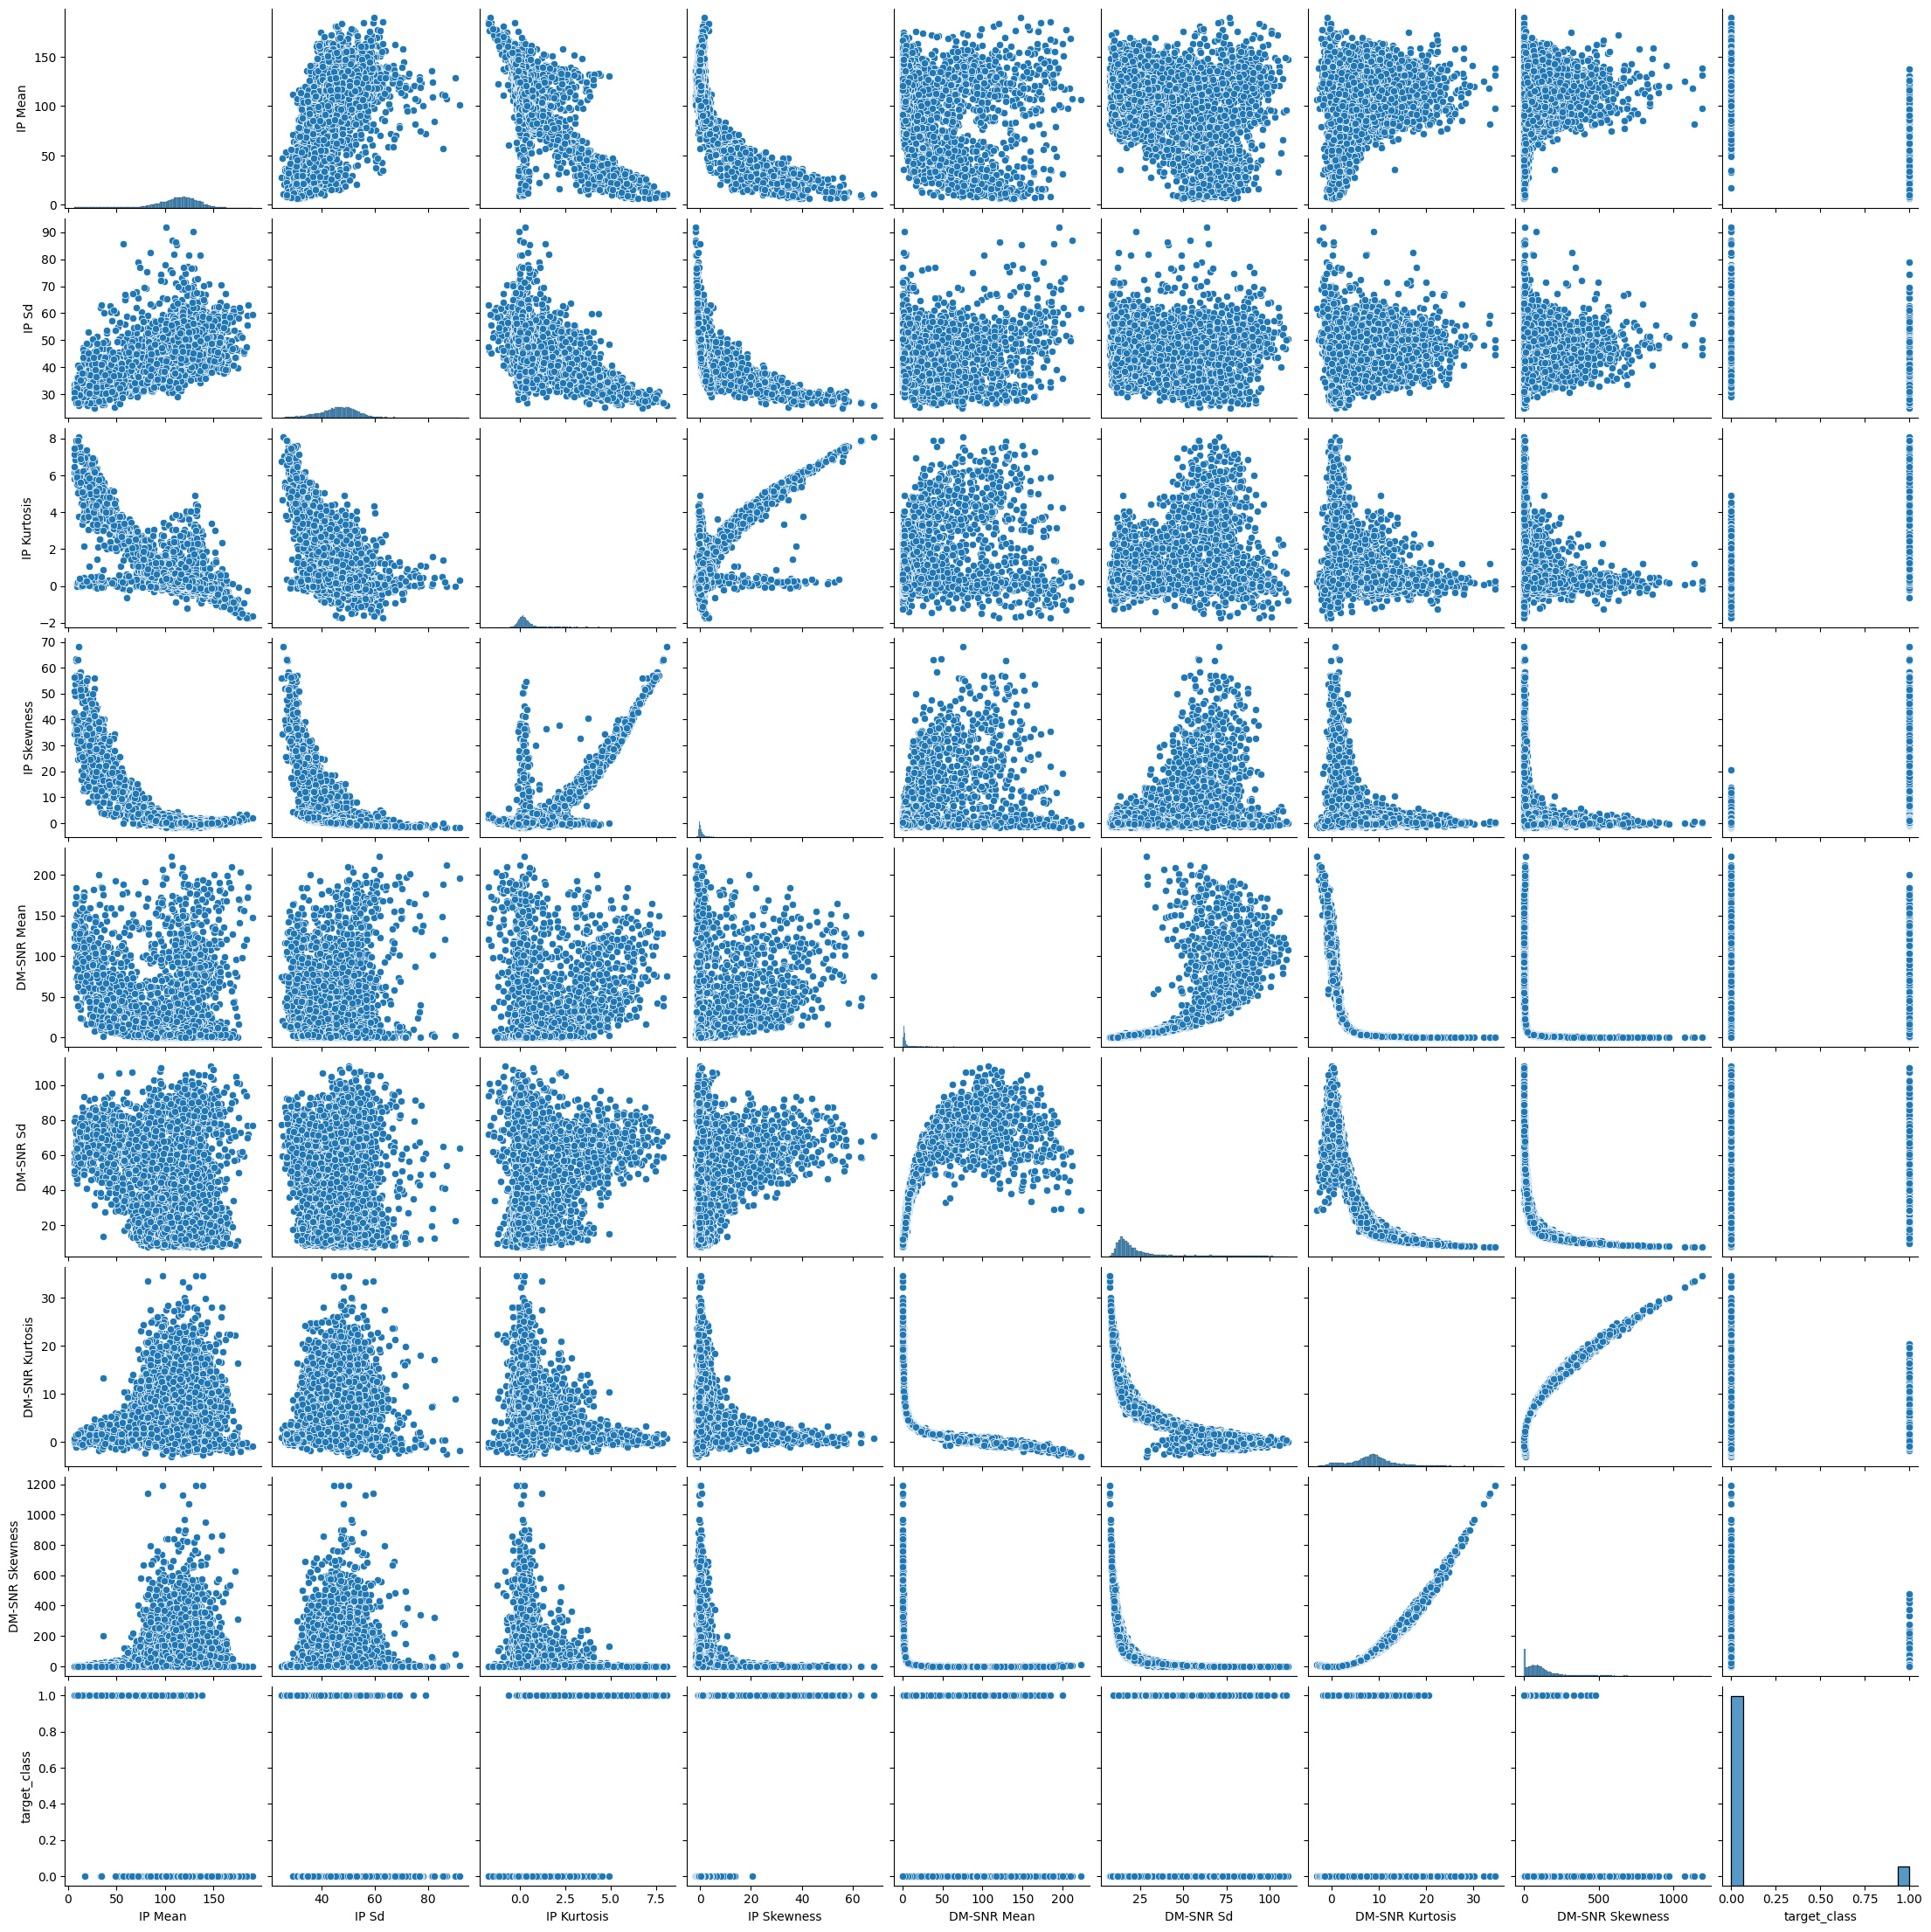

In [60]:
sns.pairplot(df)

In [61]:
df.corr()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
IP Mean,1.000000,0.548160,-0.772428,-0.737689,-0.303405,-0.312258,0.238480,0.147956,-0.677034
IP Sd,0.548160,1.000000,-0.466124,-0.539759,-0.004607,-0.059034,0.037658,0.033841,-0.367021
IP Kurtosis,-0.772428,-0.466124,1.000000,0.839501,0.374496,0.389074,-0.308660,-0.195371,0.704567
IP Skewness,-0.737689,-0.539759,0.839501,1.000000,0.415166,0.419041,-0.330622,-0.206286,0.706957
DM-SNR Mean,-0.303405,-0.004607,0.374496,0.415166,1.000000,0.795833,-0.617192,-0.355163,0.402653
DM-SNR Sd,-0.312258,-0.059034,0.389074,0.419041,0.795833,1.000000,-0.807746,-0.574594,0.495076
DM-SNR Kurtosis,0.238480,0.037658,-0.308660,-0.330622,-0.617192,-0.807746,1.000000,0.924151,-0.391149
DM-SNR Skewness,0.147956,0.033841,-0.195371,-0.206286,-0.355163,-0.574594,0.924151,1.000000,-0.259458
target_class,-0.677034,-0.367021,0.704567,0.706957,0.402653,0.495076,-0.391149,-0.259458,1.000000


<Axes: >

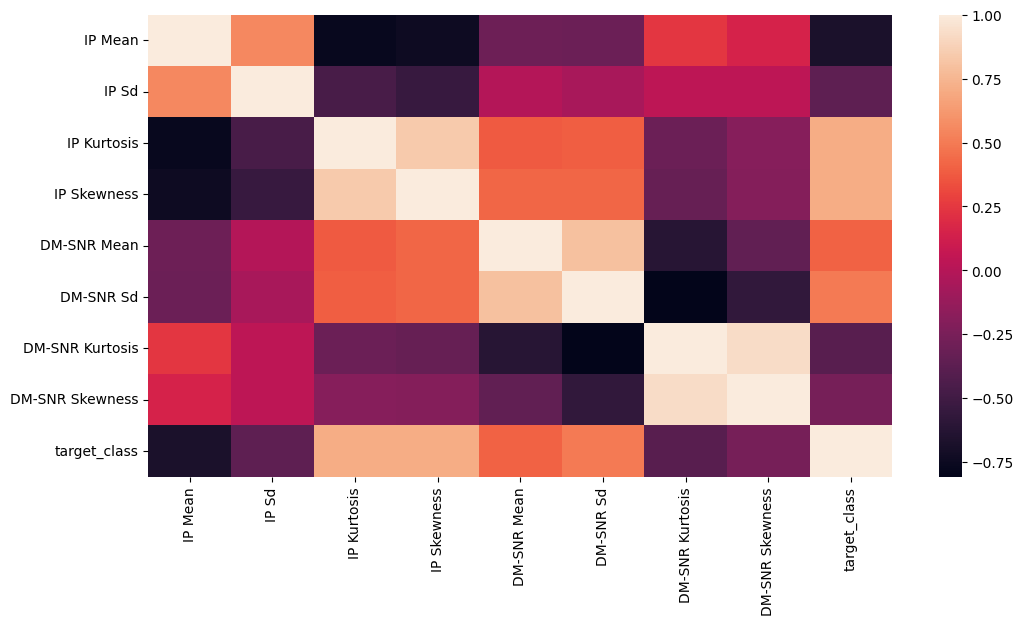

In [62]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr())

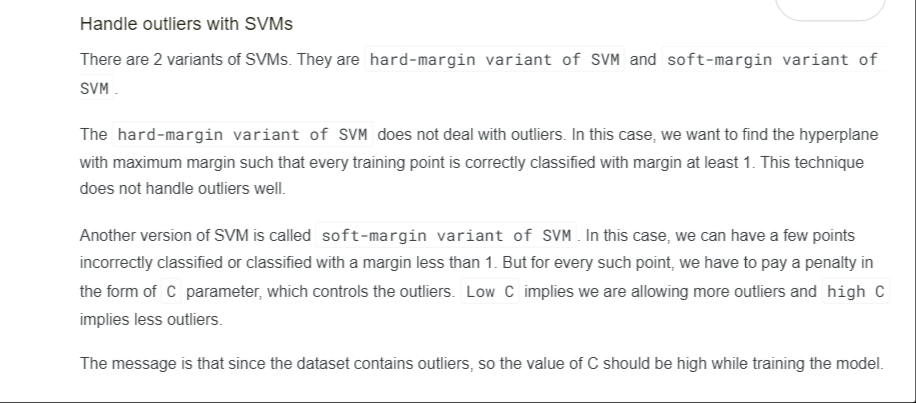

In [69]:
scaler = StandardScaler()

In [70]:
x = df.drop("target_class", axis=1)
y = df["target_class"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [73]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_train = pd.DataFrame(
    X_train,
)
X_test = pd.DataFrame(
    X_test,
)

In [75]:
X_train.columns = [
    "IP Mean",
    "IP Sd",
    "IP Kurtosis",
    "IP Skewness",
    "DM-SNR Mean",
    "DM-SNR Sd",
    "DM-SNR Kurtosis",
    "DM-SNR Skewness",
]

In [76]:
X_test.columns = [
    "IP Mean",
    "IP Sd",
    "IP Kurtosis",
    "IP Skewness",
    "DM-SNR Mean",
    "DM-SNR Sd",
    "DM-SNR Kurtosis",
    "DM-SNR Skewness",
]

In [77]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,8.625000e+03,8.625000e+03,8.625000e+03,8.625000e+03,8.625000e+03,8.625000e+03,8.625000e+03,8.625000e+03
mean,-2.150164e-16,-3.624798e-16,-6.343396e-17,-5.107670e-17,2.059544e-17,1.208952e-16,9.391521e-17,5.354815e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-4.070361e+00,-3.171540e+00,-2.153042e+00,-5.723389e-01,-4.211780e-01,-9.681792e-01,-2.519149e+00,-9.990881e-01
25%,-3.929968e-01,-6.108605e-01,-4.290062e-01,-3.169943e-01,-3.650932e-01,-6.095415e-01,-5.570274e-01,-6.580205e-01
50%,1.583348e-01,5.582998e-02,-2.413541e-01,-2.534669e-01,-3.353606e-01,-4.047591e-01,2.635143e-02,-2.079989e-01
75%,6.253594e-01,6.577669e-01,-5.625001e-03,-1.349442e-01,-2.473541e-01,9.884107e-02,5.315352e-01,3.212442e-01
max,3.054494e+00,6.627204e+00,7.387439e+00,1.056258e+01,6.943020e+00,4.296836e+00,5.769047e+00,1.009784e+01


In [111]:
svc = SVC(
    kernel="linear",
    C=100.0,
)

In [112]:
svc.fit(X_train, y_train)
#   kernel: ((...) -> Any) | Literal['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] = "rbf"

# we wil try all kernel parameters

SVC(C=100.0, kernel='linear')

In [113]:
y_pred = svc.predict(X_test)

In [114]:
print(
    "Model accuracy score with default hyperparameters: {0:0.4f}".format(
        accuracy_score(y_test, y_pred)
    )
)

Model accuracy score with default hyperparameters: 0.9811


In [115]:
y_test.value_counts()

target_class
0.0    1692
1.0     163
Name: count, dtype: int64

In [ ]:
for i in range(100, 1000, 50):
    svc = SVC(C=i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(
        "Model accuracy score with default hyperparameters: {0:0.4f}".format(
            accuracy_score(y_test, y_pred)
        )
    ),
    print(f"In C = {i}")

In [89]:
kernal = ['linear', 'poly', 'rbf', 'sigmoid'] 

for i in kernal :
    svc = SVC(C=100,kernel= i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(
        "Model accuracy score with default hyperparameters: {0:0.4f}".format(
            accuracy_score(y_test, y_pred)
        )
    ),
    print(f"In Kernal = {i}")

Model accuracy score with default hyperparameters: 0.9703
In Kernal = linear
Model accuracy score with default hyperparameters: 0.9717
In Kernal = poly
Model accuracy score with default hyperparameters: 0.9736
In Kernal = rbf
Model accuracy score with default hyperparameters: 0.8665
In Kernal = sigmoid


In [90]:
svc = SVC(C=100, kernel="rbf")

In [91]:
svc.fit(X_train, y_train)

SVC(C=100)

In [92]:
y_pred = svc.predict(X_test)

In [98]:
print( "Model accuracy score with default hyperparameters: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9736


In [100]:
y_test

10143    0.0
880      0.0
5713     0.0
7777     0.0
4624     0.0
        ... 
12404    1.0
9783     0.0
1970     0.0
7611     0.0
3625     0.0
Name: target_class, Length: 2157, dtype: float64

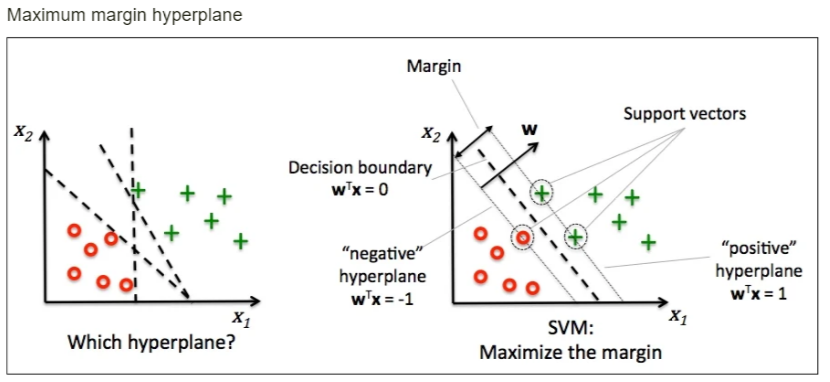

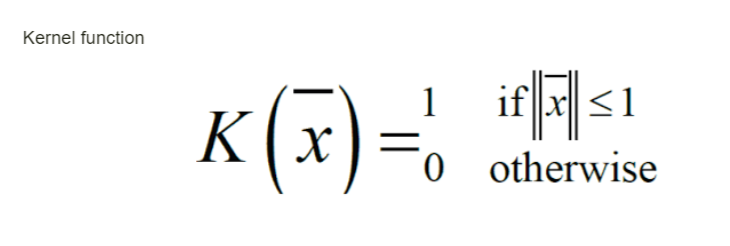

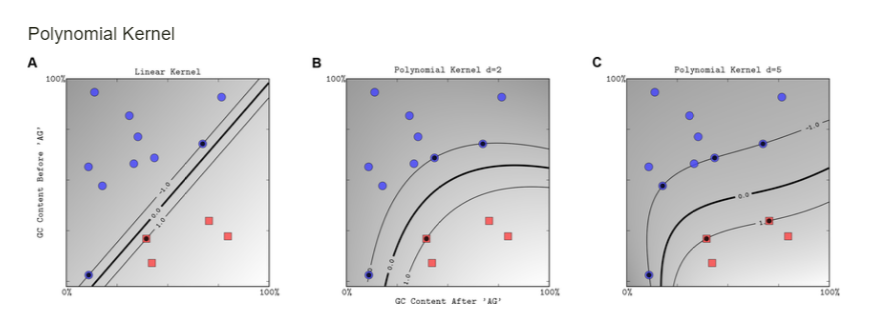